In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import ISLP

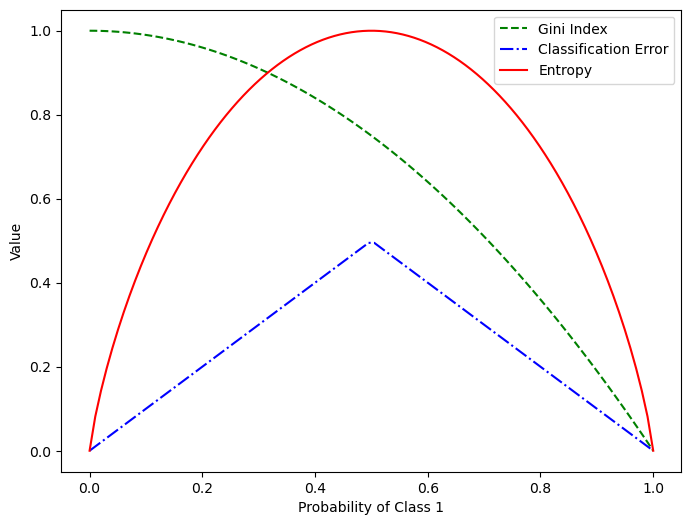

In [2]:
#8.3
#defining func
def gini(p):
    return 1 - np.sum(p**2)

def classification_error(p):
    return 1 - np.max([p, 1 - p])

def entropy(p):
    return - p*np.log2(p) - (1 - p)*np.log2((1 - p))

p = np.linspace(0, 1, 100)

# plugging in values
gini_val = [gini(i) for i in p]
error_val = [classification_error(i) for i in p]
entropy_val = [entropy(i) if i != 0 and i != 1 else 0 for i in p]

# plotiting
plt.figure(figsize=(8, 6))
plt.plot(p, gini_val, label='Gini Index', linestyle='--', color='green')
plt.plot(p, error_val, label='Classification Error', linestyle='-.', color='blue')
plt.plot(p, entropy_val, label='Entropy', linestyle='-', color='red')
plt.xlabel('Probability of Class 1')
plt.ylabel('Value')
plt.legend()
plt.show()

# 8.5
### P(Class is Red|X):
**Majority Vote Approach:**
Here, we classify based on the most common class predicted by the bootstrapped samples. we have probabilities instead of class, thus if the probability is more than 0.5, we predict red, if it is 0.5 or less, we predict green.

therefore 
predict "Red" for probabilities: 0.55, 0.6, 0.6, 0.65, 0.7, 0.75 (6 times)
predict "Green" for probabilities: 0.1, 0.15, 0.2, 0.2 (4 times)
Since red is predicted more times than green, the final classification under the majority vote approach is red.


**Average Probability Approach:**
In this approach, we calculate the average of the probabilities and classify based on this average.
The average probability is: (0.1 + 0.15 + 0.2 + 0.2 + 0.55 + 0.6 + 0.6 + 0.65 + 0.7 + 0.75) / 10 = 0.47
Since the average probability (0.47) is less than 0.5, the final classification under the average probability approach is green

# 8.12


In [5]:
heart = pd.read_csv('heart.csv')
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
heart.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [7]:
heart.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
heart['Sex'] = heart['Sex'].map({'M': 1, 'F': 0})
heart['ExerciseAngina'] = heart['ExerciseAngina'].map({'Y': 1, 'N': 0})
heart['ChestPainType'] = heart['ChestPainType'].map({'ATA': 0, 'NAP': 1, 'ASY': 2, 'TA': 3})
heart['RestingECG'] = heart['RestingECG'].map({'Normal': 0, 'ST': 1, 'LVH': 2})
heart['ST_Slope'] = heart['ST_Slope'].map({'Up': 0, 'Flat': 1, 'Down': 2})

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = heart.drop('HeartDisease', axis=1) 
y = heart['HeartDisease'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
#applying the algos - logistic, boosting, bagging, random forest, BART

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from ISLP.bart import BART

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Bagging Classifier": BaggingClassifier()
}

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
results = []

for name, model in models.items():
    
    scores = cross_validate(model, X_train, y_train, cv=5, scoring=scoring, return_train_score=False)
    accuracy = np.mean(scores['test_accuracy'])
    precision = np.mean(scores['test_precision'])
    recall = np.mean(scores['test_recall'])
    f1 = np.mean(scores['test_f1'])
    auc = np.mean(scores['test_roc_auc'])
    
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,
        "AUC": auc,
    })

In [11]:
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="Accuracy", ascending=False)
# Display the model performance results
results_df

,Model,Accuracy,Precision,Recall,F1-score,AUC
2,Gradient Boosting,0.867563,0.869392,0.886658,0.877482,0.920951
1,Random Forest,0.855087,0.853002,0.883887,0.866970,0.923050
0,Logistic Regression,0.842611,0.848679,0.860571,0.854246,0.901190
3,Bagging Classifier,0.825424,0.834396,0.846164,0.838576,0.894912


In [12]:
#handling BART seperately
bart_model = BART()
bart_model.fit(X, y)
y_pred = bart_model.predict(X)

# Convert predictions to binary class labels
y_pred_class = np.where(y_pred > 0.5, 1, 0)

# Evaluating
accuracy = accuracy_score(y, y_pred_class)
auc = roc_auc_score(y, y_pred)
precision = precision_score(y, y_pred_class)
f1 = f1_score(y, y_pred_class)

print(f"Accuracy: {accuracy}")
print(f"AUC: {auc}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")

Accuracy: 0.8899782135076253
AUC: 0.9437007874015748
Precision: 0.8891013384321224
F1 Score: 0.9020368574199806


# 9.1 

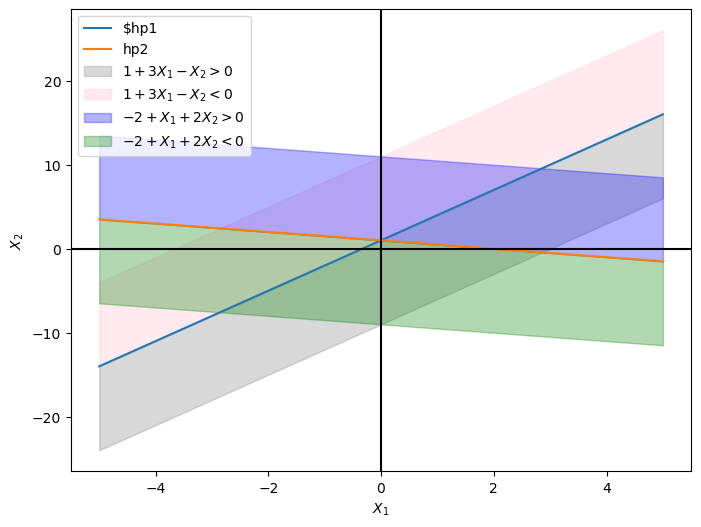

In [14]:

x1 = np.linspace(-5, 5, 400)
hp1 = 1 + 3 * x1  # X2 = 1 + 3X1
hp2 = (2 - x1) / 2  # X2 = (2 - X1) / 2
plt.figure(figsize=(8, 6))
plt.plot(x1, hp1, label=r'$hp1')
plt.plot(x1, hp2, label=r'hp2')
plt.fill_between(x1, hp1, hp1 - 10, alpha=0.3, color='grey', label=r'$1 + 3X_1 - X_2 > 0$')
plt.fill_between(x1, hp1, hp1 + 10, alpha=0.3, color='pink', label=r'$1 + 3X_1 - X_2 < 0$')
plt.fill_between(x1, hp2, hp2 + 10, alpha=0.3, color='blue', label=r'$-2 + X_1 + 2X_2 > 0$')
plt.fill_between(x1, hp2, hp2 - 10, alpha=0.3, color='green', label=r'$-2 + X_1 + 2X_2 < 0$')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend()
plt.show()

# 9.5 

In [16]:
#a)
rng = np.random.default_rng(5)
x1 = rng.uniform(size=500) - 0.5
x2 = rng.uniform(size=500) - 0.5
y = x1**2 - x2**2 > 0

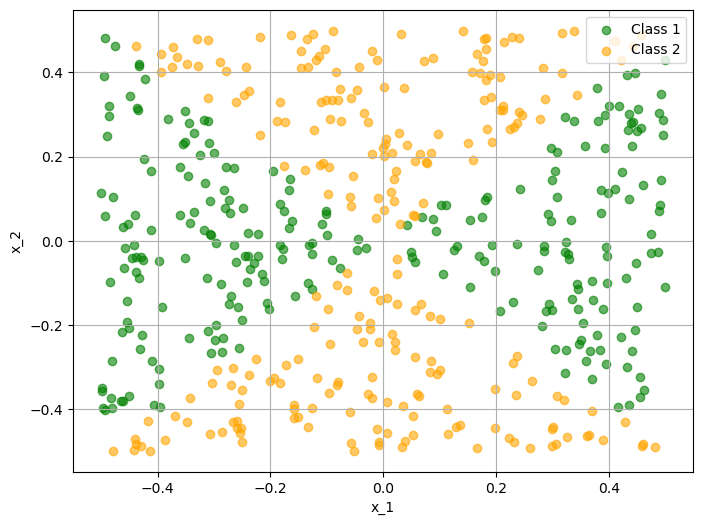

In [17]:
#b)
plt.figure(figsize=(8, 6))
plt.scatter(x1[y], x2[y], color='green', label='Class 1', alpha=0.6)
plt.scatter(x1[~y], x2[~y], color='orange', label='Class 2', alpha=0.6)
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
#c)
X = np.column_stack((x1, x2))
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

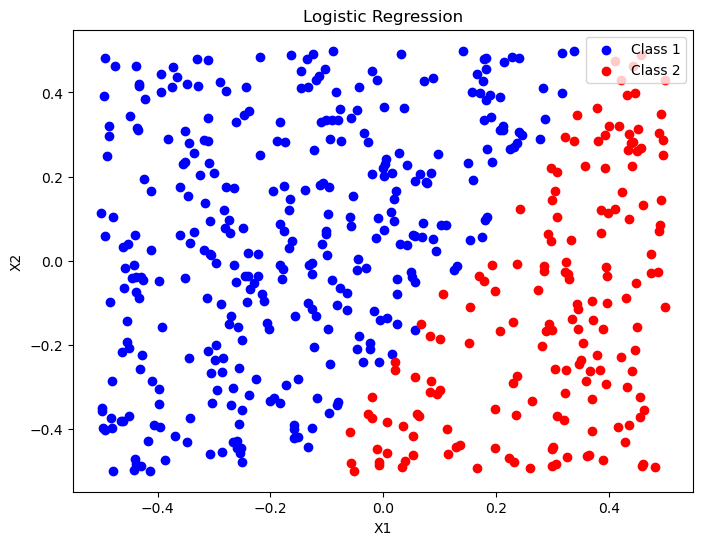

In [19]:
#d)
y_pred_logreg = log_reg.predict(X)
plt.figure(figsize=(8, 6))
plt.scatter(x1[y_pred_logreg], x2[y_pred_logreg], c='blue', label='Class 1')
plt.scatter(x1[~y_pred_logreg], x2[~y_pred_logreg], c='red', label='Class 2')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Logistic Regression')
plt.legend()
plt.show()

In [20]:
# (e) Fit a logistic regression model to the data using non-linear functions
X_nonlinear = np.column_stack((x1, x2, x1**2, x2**2, x1*x2, np.log(np.abs(x2))))
logreg_nonlinear = LogisticRegression()
logreg_nonlinear.fit(X_nonlinear, y)

LogisticRegression()

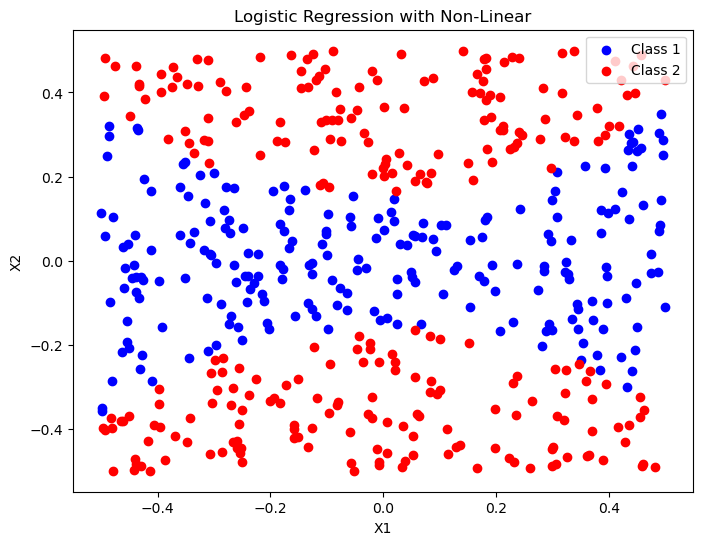

In [21]:
# (f) Apply this model to the training data
y_pred_logreg_nonlinear = logreg_nonlinear.predict(X_nonlinear)
plt.figure(figsize=(8, 6))
plt.scatter(x1[y_pred_logreg_nonlinear], x2[y_pred_logreg_nonlinear], c='blue', label='Class 1')
plt.scatter(x1[~y_pred_logreg_nonlinear], x2[~y_pred_logreg_nonlinear], c='red', label='Class 2')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Logistic Regression with Non-Linear')
plt.legend()
plt.show()

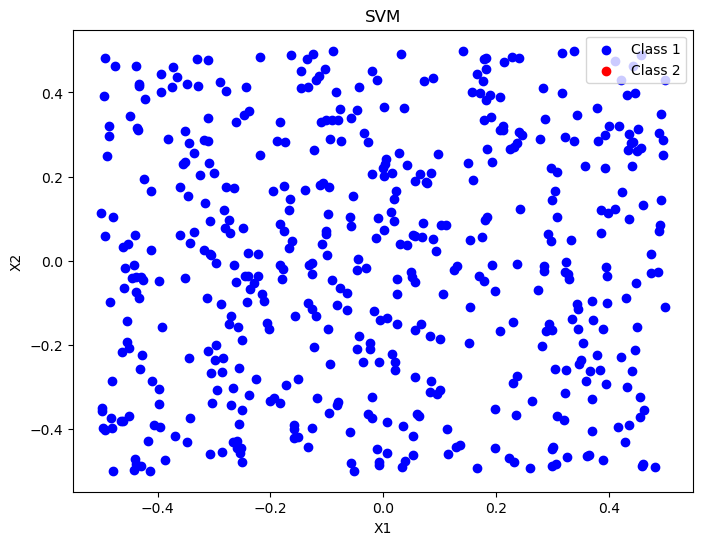

In [22]:
# (g) Fit a support vector classifier to the data
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(X, y)
y_pred_svm = svm.predict(X)
plt.figure(figsize=(8, 6))
plt.scatter(x1[y_pred_svm], x2[y_pred_svm], c='blue', label='Class 1')
plt.scatter(x1[~y_pred_svm], x2[~y_pred_svm], c='red', label='Class 2')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('SVM')
plt.legend()
plt.show()

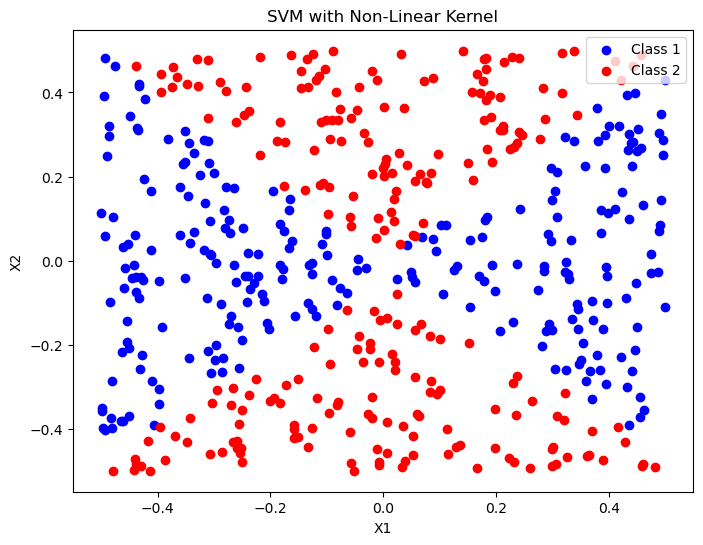

In [23]:

# (h) Fit a SVM using a non-linear kernel to the data
svm_nonlinear = SVC(kernel='rbf')
svm_nonlinear.fit(X, y)
y_pred_svm_nonlinear = svm_nonlinear.predict(X)
plt.figure(figsize=(8, 6))
plt.scatter(x1[y_pred_svm_nonlinear], x2[y_pred_svm_nonlinear], c='blue', label='Class 1')
plt.scatter(x1[~y_pred_svm_nonlinear], x2[~y_pred_svm_nonlinear], c='red', label='Class 2')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('SVM with Non-Linear Kernel')
plt.legend()
plt.show()

### (i) Comment on your results
The logistic regression model with linear functions is not able to capture the non-linear decision boundary.
The logistic regression model with non-linear functions is able to capture the non-linear decision boundary.
The support vector machine with linear kernel is not able to capture the non-linear decision boundary.
The support vector machine with non-linear kernel is able to capture the non-linear decision boundary.

# 9.8

In [26]:
#a) 
from ISLP import load_data
import sklearn.model_selection as skm
OJ=load_data('OJ')
OJ['Store7']=np.where(OJ['Store7']=='Yes',1,0)
training,test=skm.train_test_split(OJ,train_size=800,random_state=11)

In [27]:
#b)
X_training=training.iloc[:,1:]
y_train=training['Purchase']

no_scale=['StoreID', 'SpecialCH', 'SpecialMM', 'Store7', 'STORE']
scale_feat=X_training[X_training.columns.difference(no_scale)]
scaled_features=StandardScaler().fit_transform(scale_feat)
p1= pd.DataFrame(scaled_features, columns=X_training.columns.difference(no_scale))
p2= X_training[no_scale].reset_index(drop=True)
X_train=pd.concat([p1,p2],axis=1)

In [28]:
svm_linear= SVC(C=0.01, kernel='linear')
svm_linear.fit(X_train, y_train)

SVC(C=0.01, kernel='linear')

In [29]:
svm_linear.n_support_
#There are 435 support vectors, 218 observations among them belong to CH class.

array([218, 217], dtype=int32)

In [30]:
#c)
X_testing=test.iloc[:,1:]
y_test=test['Purchase']
scale_feat=X_testing[X_testing.columns.difference(no_scale)]
scaled_features=StandardScaler().fit_transform(scale_feat)
p1= pd.DataFrame(scaled_features, columns=X_testing.columns.difference(no_scale))
p2= X_testing[no_scale].reset_index(drop=True)
X_test=pd.concat([p1,p2],axis=1)

In [31]:
test_error=1-svm_linear.score(X_test,y_test)
train_error=1-svm_linear.score(X_train,y_train)
print('Training error for SVM',train_error)
print('Test error for SVM',test_error)

Training error for SVM 0.17374999999999996
Test error for SVM 0.18148148148148147


In [32]:
#d) 
kfold = skm.KFold(5,random_state=0,shuffle=True)
grid_linear = skm.GridSearchCV(svm_linear,{'C':[0.01,0.1,1,10]},refit=True,cv=kfold,scoring='accuracy')
grid_linear.fit(X_train.values, y_train)
print('The best tuning parameter',grid_linear.best_params_)

The best tuning parameter {'C': 1}


In [33]:
#e)
best_estimator=grid_linear.best_estimator_
best_test=1-best_estimator.score(X_test.values,y_test)
best_train=1-best_estimator.score(X_train.values,y_train)
print('Training error ',best_train)
print('Test error',best_test)

Training error  0.15625
Test error 0.18148148148148147


In [34]:
#f)
svm_rbf1= SVC(C=0.01, kernel='rbf')
svm_rbf1.fit(X_train, y_train)
testerror_rbf=1-svm_rbf1.score(X_test,y_test)
trainerror_rbf=1-svm_rbf1.score(X_train,y_train)
print('Training error wtih C=0.01 is',trainerror_rbf)
print('Test error',testerror_rbf)

Training error wtih C=0.01 is 0.38249999999999995
Test error 0.4111111111111111


In [35]:
grid_rbf = skm.GridSearchCV(svm_rbf1,{'C':[0.01,0.1,1,10,100]},refit=True,cv=kfold,scoring='accuracy')
grid_rbf.fit(X_train.values, y_train)
print('The best tuning parameter is',grid_rbf.best_params_)

svm_rbf_best=grid_rbf.best_estimator_
rbf_best_test_error=1-svm_rbf_best.score(X_test.values,y_test)
rbf_best_train_error=1-svm_rbf_best.score(X_train.values,y_train)
print('Training error ',rbf_best_train_error)
print('Test error',rbf_best_test_error)

The best tuning parameter is {'C': 10}
Training error  0.14625
Test error 0.18888888888888888


In [36]:
#g)
svm_poly1= SVC(C=0.01, kernel='poly',degree=2)
svm_poly1.fit(X_train, y_train)
test_error_poly=1-svm_poly1.score(X_test,y_test)
train_error_poly=1-svm_poly1.score(X_train,y_train)
print('Training error for the SVM wtih C=0.01 and polynomial kernel is',train_error_poly)
print('Test error',test_error_poly)

grid_poly = skm.GridSearchCV(svm_poly1,{'C':[0.01,0.1,1,10,100]},refit=True,
                             cv=kfold,scoring='accuracy')
grid_poly.fit(X_train.values, y_train)
print('The best tuning parameter is',grid_poly.best_params_)

svm_poly_best=grid_poly.best_estimator_
poly_best_test_error=1-svm_poly_best.score(X_test.values,y_test)
poly_best_train_error=1-svm_poly_best.score(X_train.values,y_train)
print('Training error for the SVM with a polynomial kernel and the best\
tuning parameter is',poly_best_train_error)
print('Test error',poly_best_test_error)

Training error for the SVM wtih C=0.01 and polynomial kernel is 0.38249999999999995
Test error 0.4111111111111111
The best tuning parameter is {'C': 10}
Training error for the SVM with a polynomial kernel and the besttuning parameter is 0.14625
Test error 0.18518518518518523


# h)
By looking at the best test errors, we see that the three kernels perform almost the same, with the linear decision boundary being slightly better, having an error of 18.15%.